In [1]:
import depoSimulator

import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

0.21999971900818643


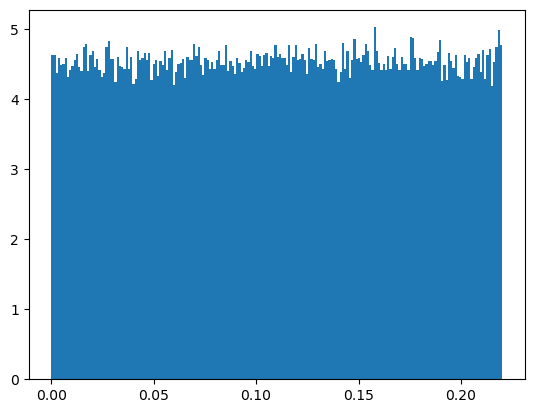

In [2]:
a = np.random.rand(int(2e5))*0.22
nptest = np.histogram(a, bins=200, range=[0, 0.22])
print(a.max())
fig, axs = plt.subplots()

dist = axs.hist(a, bins = 200, range=[0, 0.22], density=True)

distGen = dist[0]*3e3

distNorm = distGen*dist[1][1:]*2*np.pi

(1897040,)


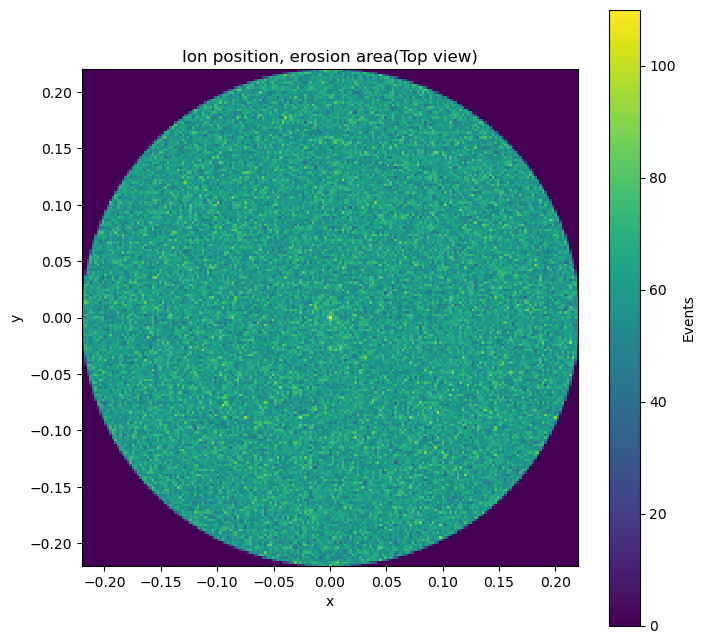

In [3]:
gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(distNorm[0][i])
    theta = np.random.rand(int(distNorm[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(distNorm[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [4]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[200-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [5]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[left_side:200-left_side, left_side:200-left_side, 0:height] = 10
# film[left_side:200-left_side, left_side:200-left_side, 0:height] = 10

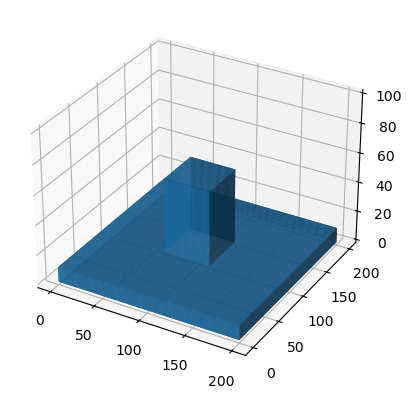

In [6]:
indice_wall = np.array(film == 10)
# in_depo = np.logical_and(result > 0, result < 1)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
# ax.voxels(in_depo)

plt.show()

In [7]:
test = depoSimulator.depo(param = [1.6, -0.7], TS = 0.11, N = gen_dist_x.shape[0], sub_xy=[0,0], film=film)

In [8]:
deposit = test.runDepoition(3, 125, N = gen_dist_x.shape[0], weight=1)

running: 100%|██████████████████████████████████████████████████████| 100/100 [02:37<00:00, 1.57s/B]


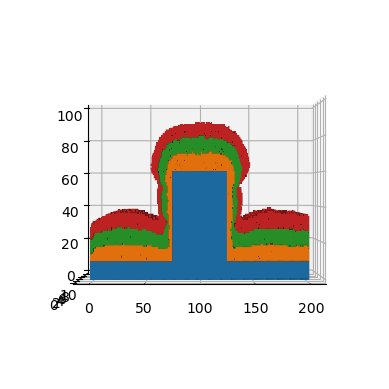

In [9]:
openWidth = 95

indice_wall = np.array(film[:, openWidth:200-openWidth, :] == 10)
# in_depo = np.logical_and(result[:, openWidth:200-openWidth, :] > 0, result[:, openWidth:200-openWidth, :] != 10)
in_depo = np.array(deposit[:, openWidth:200-openWidth, :] == 20)
# in_depo2 = np.logical_and(result2[:, openWidth:200-openWidth, :] > 0, result2[:, openWidth:200-openWidth, :] != 10, result2[:, openWidth:200-openWidth, :] != 20)
in_depo2 = np.array(deposit[:, openWidth:200-openWidth, :] == 40)
in_depo3 = np.array(deposit[:, openWidth:200-openWidth, :] == 60)
in_depo4 = np.array(deposit[:, openWidth:200-openWidth, :] == 80)
in_depo5 = np.array(deposit[:, openWidth:200-openWidth, :] == 100)
in_depo6 = np.array(deposit[:, openWidth:200-openWidth, :] == 120)
in_depo7 = np.array(deposit[:, openWidth:200-openWidth, :] == 140)
in_depo8 = np.array(deposit[:, openWidth:200-openWidth, :] == 160)
# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)
ax.voxels(in_depo5)
ax.voxels(in_depo6)
ax.voxels(in_depo7)
ax.voxels(in_depo8)
ax.view_init(elev=0, azim=-90, roll=0)

In [10]:
np.savez('depoData0423.npz', deposit)

In [22]:
deposit = np.load('./depoData0423.npz')['arr_0']
print(deposit)

[[[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]]

 [[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]]

 [[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]]

 ...

 [[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]]

 [[10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  ...
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  0.]
  [10. 10. 10. ...  0.  0.  

In [11]:
import etchingSimulator

In [23]:
etchfilm = np.zeros((200, 200, 100))

deposit_etch = deposit == 40
a = np.where(deposit_etch == True)
deposit_etch_10 = deposit == 10
b = np.where(deposit_etch_10 == True)
deposit_etch_20 = deposit == 20
c = np.where(deposit_etch_20 == True)

deposit_etch_60 = deposit == 60
d = np.where(deposit_etch_60 == True)

etchfilm[a] = -10
etchfilm[b] = -10
etchfilm[c] = -10
etchfilm[d] = -10

In [24]:
etchfilm[90:110, 100, :30]

array([[-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10.],
       [-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10.],
       [-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10.],
       [-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10.],
       [-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -10., 

In [25]:
testEtch = etchingSimulator.etching(param = [1.6, -0.7], TS = 0.11, N = 120000, sub_xy=[0,0], film=etchfilm)

In [26]:
print(gen_dist_x.shape[0])

1897040


In [27]:
etching = testEtch.runEtching(step=1, tstep=1e-3, seed=125, N = 120000, weight=1e-2)

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

running: 100%|██████████████████████████████████████████████████████| 100/100 [12:25<00:00, 7.45s/B]


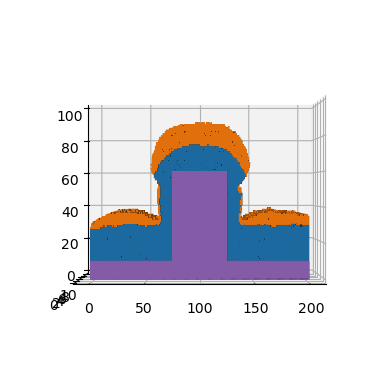

In [28]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[left_side:200-left_side, left_side:200-left_side, 0:height] = 10

openWidth = 95

substrate = np.array(film[:,openWidth:200-openWidth,  :] == 10)
indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
# ax.voxels(in_depo3)
ax.voxels(in_depo4)
ax.voxels(substrate)

ax.view_init(elev=0, azim=-90, roll=0)

In [12]:
etching[90:110, 100, :30]

array([[ -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,
         -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10., -100.,
        -100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [ -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,
         -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10., -100.,
        -100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [ -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,
         -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10., -100.,
        -100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [ -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,
         -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,
         -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [ -10.,  -10.,  -10.,

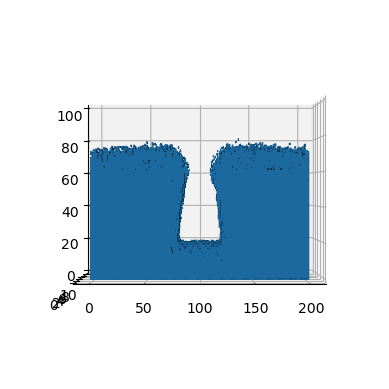

In [15]:
openWidth = 95

indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
# ax.voxels(in_depo3)
ax.voxels(in_depo4)

ax.view_init(elev=0, azim=-90, roll=0)

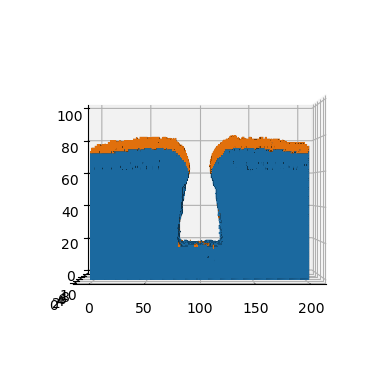

In [31]:
openWidth = 95

indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
# ax.voxels(in_depo3)
ax.voxels(in_depo4)

ax.view_init(elev=0, azim=-90, roll=0)

In [34]:
etching[90:110, 100, :30]

array([[  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
          10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         -10.,  -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
          10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         -10.,  -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
          10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
          10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         -10.,  -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [  10.,   10.,   10.,

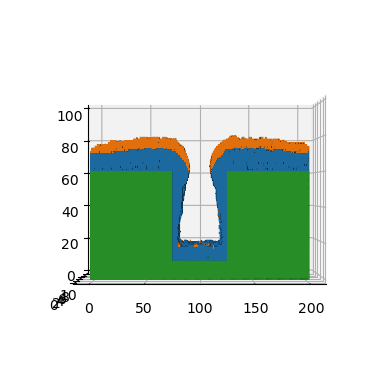

In [36]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 5 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 5
film[:, 0:left_side, 0:height] = 5
film[200-right_side:, :, 0:height] = 5
film[0:left_side, :, 0:height] = 5

openWidth = 95

substrate = np.array(film[:,openWidth:200-openWidth,  :] == 5)
indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == 10)
# in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
# in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
# in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
# ax.voxels(substrate)
ax.voxels(indice_wall)
# ax.voxels(in_depo2)
ax.voxels(in_depo)
# ax.voxels(in_depo2)
# ax.voxels(in_depo3)
# ax.voxels(in_depo4)
ax.voxels(substrate)
ax.view_init(elev=0, azim=-90, roll=0)

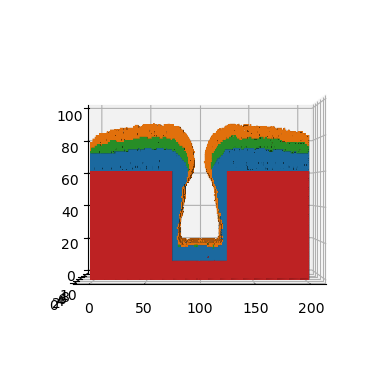

In [35]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 5 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 5
film[:, 0:left_side, 0:height] = 5
film[200-right_side:, :, 0:height] = 5
film[0:left_side, :, 0:height] = 5

openWidth = 95

substrate = np.array(film[:,openWidth:200-openWidth,  :] == 5)
indice_wall = np.array(etching[:,openWidth:200-openWidth,  :] == 10)
in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -10)
in_depo = np.array(etching[:,openWidth:200-openWidth,  :] == -100)
# in_depo2 = np.array(etching[:,openWidth:200-openWidth,  :] == -200)
# in_depo3 = np.array(etching[80:120,:,  :] == -300)
# in_depo4 = np.array(etching[:,openWidth:200-openWidth,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
# ax.voxels(substrate)
ax.voxels(indice_wall)
ax.voxels(in_depo2)
ax.voxels(in_depo)
# ax.voxels(in_depo2)
# ax.voxels(in_depo3)
# ax.voxels(in_depo4)
ax.voxels(substrate)
ax.view_init(elev=0, azim=-90, roll=0)